# First Neurons

In [51]:
import numpy as np
import tensorflow as tf

** Set Random Seeds for same results **

In [52]:
np.random.seed(101)
tf.set_random_seed(101)

** Data Setup **

Setting Up some Random Data for Demonstration Purposes

In [53]:
rand_a = np.random.uniform(0,100,(5,5))
rand_a

array([[ 51.63986277,  57.06675869,   2.84742265,  17.15216562,
         68.52769817],
       [ 83.38968626,  30.69662197,  89.36130797,  72.15438618,
         18.99389542],
       [ 55.42275911,  35.2131954 ,  18.18924027,  78.56017619,
         96.54832224],
       [ 23.23536618,   8.35614337,  60.35484223,  72.89927573,
         27.62388285],
       [ 68.53063288,  51.78674742,   4.84845374,  13.78692376,
         18.69674261]])

In [54]:
rand_b = np.random.uniform(0,100,(5,1))
rand_b

array([[ 99.43179012],
       [ 52.06653967],
       [ 57.87895355],
       [ 73.48190583],
       [ 54.19617722]])

In [ ]:
tf.random_uniform

In [5]:
# CONFIRM SAME  RANDOM NUMBERS (EXECUTE SEED IN SAME CELL!) 
np.random.seed(101)
rand_a = np.random.uniform(0,100,(5,5))
rand_b = np.random.uniform(0,100,(5,1))

In [55]:
rand_b

array([[ 99.43179012],
       [ 52.06653967],
       [ 57.87895355],
       [ 73.48190583],
       [ 54.19617722]])

### Placeholders

In [56]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

### Operations

In [57]:
add_op = a+b # tf.add(a,b)
mult_op = a*b #tf.multiply(a,b) or tf.matmul()

### Running Sessions  to create Graphs with Feed Dictionaries

In [61]:
type(add_op)

tensorflow.python.framework.ops.Tensor

In [59]:
with tf.Session() as sess:
    add_result = sess.run(add_op,feed_dict={a:10,b:20})
    print(add_result)
    
    

30.0


In [60]:
with tf.Session() as sess:
    mult_result = sess.run(mult_op,feed_dict={a:rand_a,b:rand_b})
    print(mult_result)

[[ 5134.64404297  5674.25         283.12432861  1705.47070312
   6813.83154297]
 [ 4341.8125      1598.26696777  4652.73388672  3756.8293457    988.9463501 ]
 [ 3207.8112793   2038.10290527  1052.77416992  4546.98046875
   5588.11572266]
 [ 1707.37902832   614.02526855  4434.98876953  5356.77734375
   2029.85546875]
 [ 3714.09838867  2806.64379883   262.76763916   747.19854736
   1013.29199219]]


________________________

________________________

## Example Neural Network
#Activation(Wx + b)

In [62]:
n_features = 10
n_dense_neurons = 3

In [63]:
# Placeholder for x
x = tf.placeholder(tf.float32,(None,n_features))

In [64]:
# Variables for w and b
b = tf.Variable(tf.ones([n_dense_neurons]))

W = tf.Variable(tf.random_normal([n_features,n_dense_neurons]))

** Operation Activation Function **

In [65]:
xW = tf.matmul(x,W)

In [66]:
z = tf.add(xW,b)

In [67]:
# tf.nn.relu() or tf.tanh()
a = tf.sigmoid(z)

** Variable Intializer! **

In [68]:
init = tf.global_variables_initializer()

In [69]:
with tf.Session() as sess:
    sess.run(init)
    
    layer_out = sess.run(a,feed_dict={x : np.random.random([1,n_features])})

In [70]:
print(layer_out)

[[ 0.83140981  0.02070028  0.95989543]]


# practice - 3*2 matrix multiplication and apply sigmoid
#We still need to finish off this process with optimization! Let's learn how to do this next.

_____

## Full Network Example

Let's work on a regression example, we are trying to solve a very simple equation:

y = mx + b

y will be the y_labels and x is the x_data. We are trying to figure out the slope and the intercept for the line that best fits our data!

### Artifical Data (Some Made Up Regression Data)

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline
# some data with linear form and noise. 
# add noise to y labels as well
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [72]:
x_data

array([-1.20856056, -0.08034641,  2.82674411,  4.50477294,  3.42312535,
        4.88227319,  7.18414126,  6.77068715,  9.4930023 ,  9.96290567])

In [73]:
# add some noise to y as well. 
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

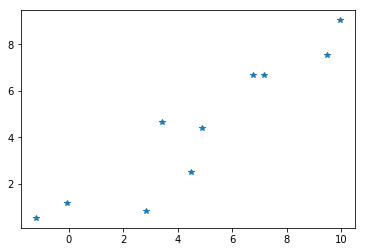

In [74]:
plt.plot(x_data,y_label,'*')

** Variables **
# y=mx+b

In [75]:
np.random.rand(2)

array([ 0.44236813,  0.87758732])

In [76]:
m = tf.Variable(0.44) #-- slope
b = tf.Variable(0.877)   # -- intercept

### Cost Function

In [83]:
error = 0
# zip = corresponds x to y
for x,y in zip(x_data,y_label):
    
    y_hat = m*x + b  #Our predicted value
    
    error += (y-y_hat)**2 # The cost we want to minimize (we'll need to use an optimization function for the minimization!)


In [84]:
error

<tf.Tensor 'add_83:0' shape=() dtype=float32>

### Optimizer

In [85]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

### Initialize Variables

In [86]:
init = tf.global_variables_initializer()

### Create Session and Run!

In [87]:
with tf.Session() as sess:
    
    sess.run(init)
    
    epochs = 100 
    
    for i in range(epochs):
        
        sess.run(train) #optimiser which is trying to minimise the error. 
        

    # Fetch Back Results
    final_slope , final_intercept = sess.run([m,b])

In [88]:
final_slope

0.75303853

In [89]:
final_intercept

0.84072506

### Evaluate Results

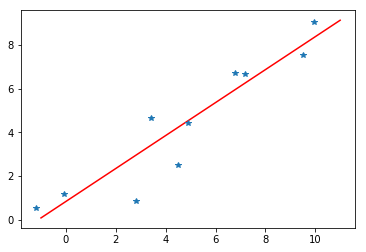

In [90]:
x_test = np.linspace(-1,11,10)
y_pred_plot = final_slope*x_test + final_intercept

plt.plot(x_test,y_pred_plot,'r')
plt.plot(x_data,y_label,'*')